# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [31]:
import statsmodels.api as sm
import pandas as pd
import plotnine as p9

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [32]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [33]:
df["am"] = df["am"].astype(str)

# Convert the other variables below
df["cyl"] = df["cyl"].astype(str)
df["vs"] = df["vs"].astype(str)
df["gear"] = df["gear"].astype(str)
df["carb"] = df["carb"].astype(str)
df.dtypes

mpg     float64
cyl      object
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs       object
am       object
gear     object
carb     object
dtype: object

If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

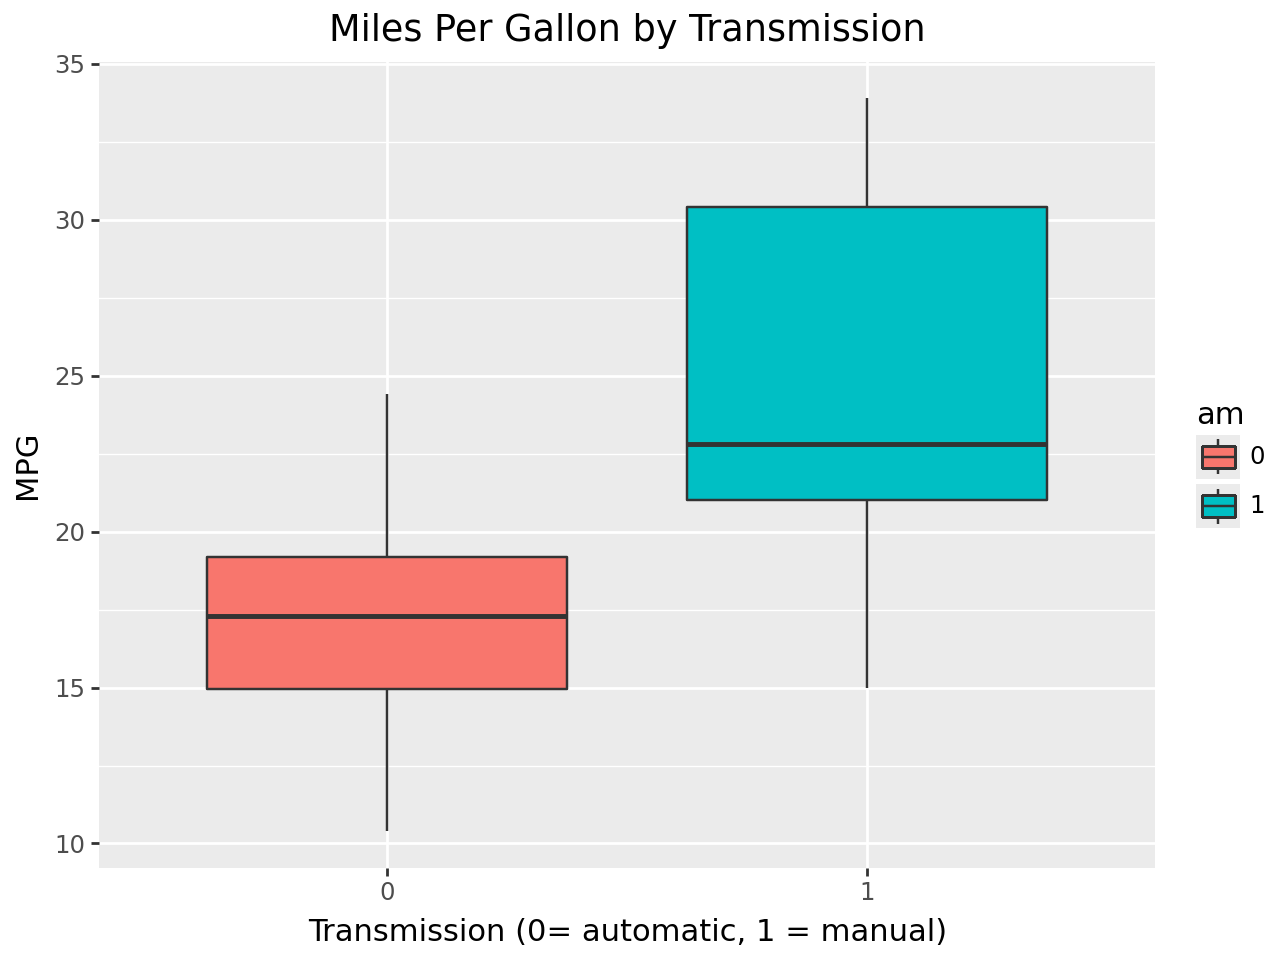

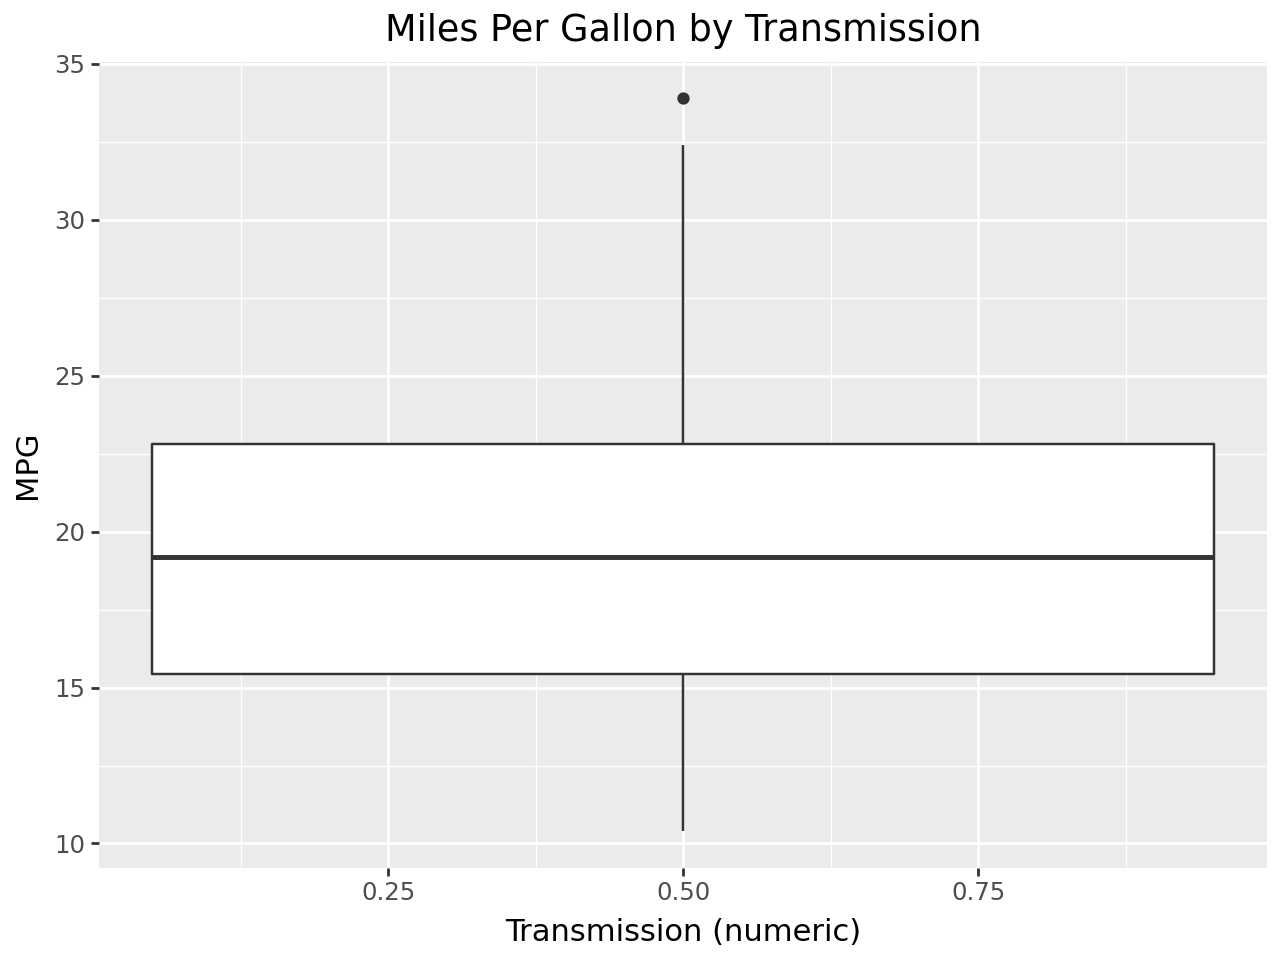

In [39]:
# Create plot for (1) here
#am as categorical
plot1 = (
    p9.ggplot(df, p9.aes(x= "am", y= "mpg", fill= "am"))
    + p9.geom_boxplot()
    + p9.labs(
        title = "Miles Per Gallon by Transmission",
        x = "Transmission (0= automatic, 1 = manual)", y= "MPG"
    )
)
plot1.show()

df_cont = df.copy()
df_cont["am"] = df_cont["am"].astype(float)

#am as continuous
plot1b = (
    p9.ggplot(df_cont, p9.aes(x = "am", y= "mpg", fill = "am"))
    + p9.geom_boxplot()
    + p9.labs(
        title = "Miles Per Gallon by Transmission",
        x = "Transmission (numeric)", y= "MPG"
    )
)
plot1b.show()

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


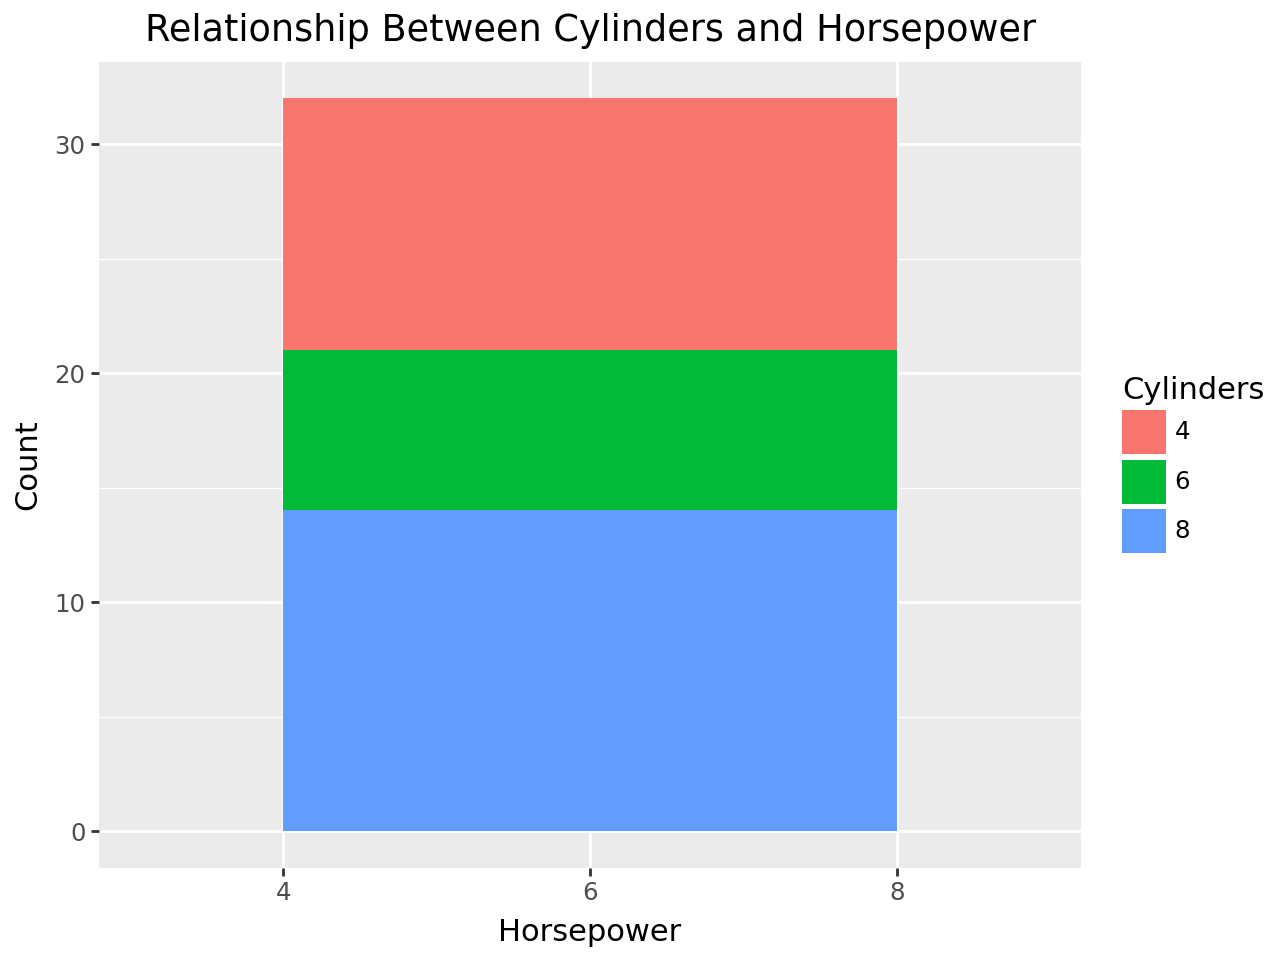

C:\Users\antar\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


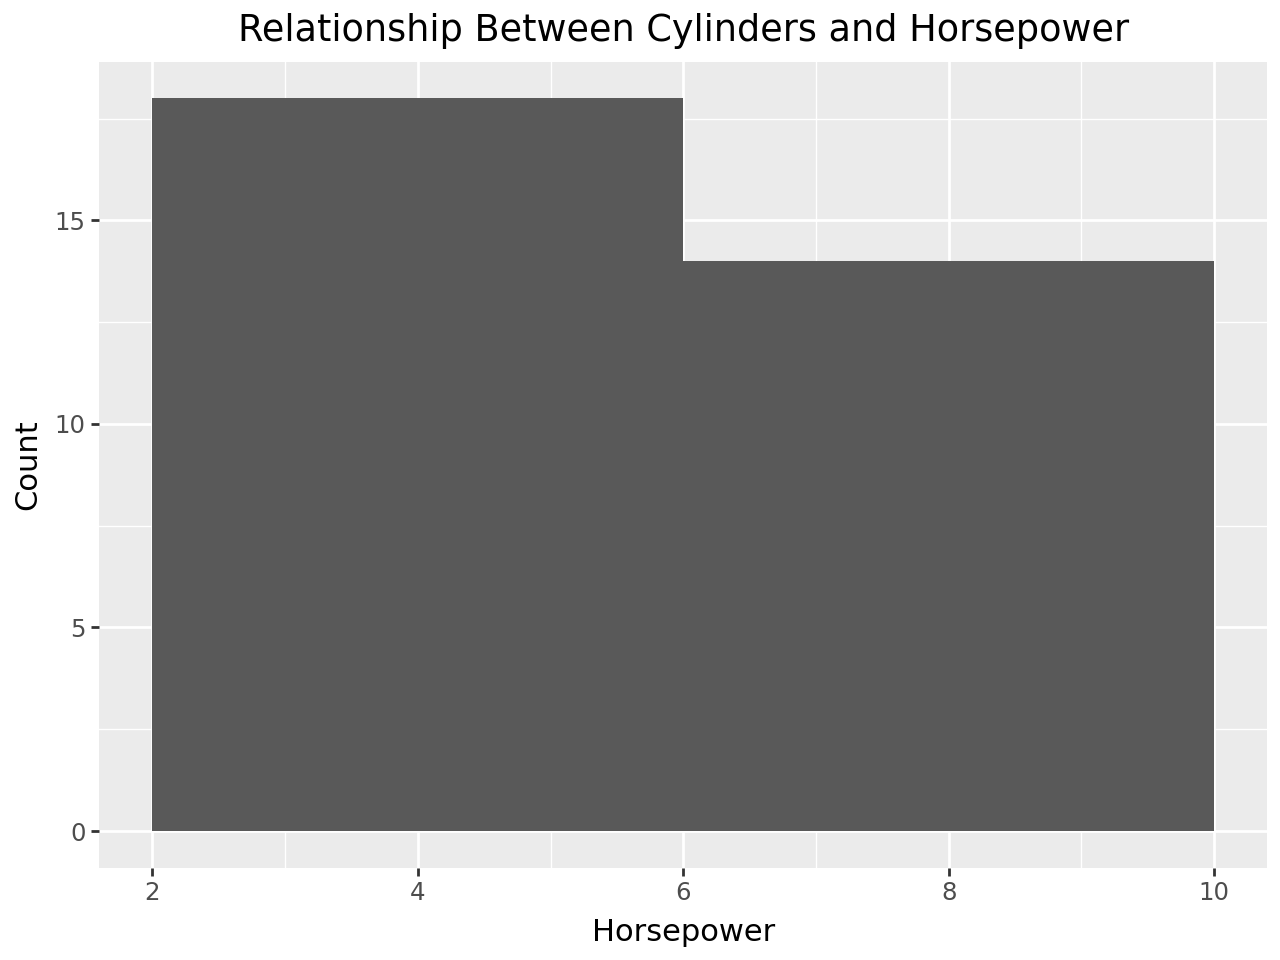

In [35]:
# Create plot for (2) here
#cylinder as categorical
plot2 = (
    p9.ggplot(df, p9.aes(x = "cyl", fill = "cyl"))
    + p9.geom_histogram()
    + p9.labs(
        title = "Relationship Between Cylinders and Horsepower",
        x = "Horsepower", y = "Count", fill = "Cylinders"
    )
)
plot2.show()

df_cont2 = df.copy()
df_cont2["cyl"] = df_cont2["cyl"].astype(float)

#cylinder as continuous 
plot2b = (
    p9.ggplot(df_cont2, p9.aes(x = "cyl", fill = "cyl"))
    + p9.geom_histogram()
    + p9.labs(
        title = "Relationship Between Cylinders and Horsepower",
        x = "Horsepower", y = "Count", fill = "Cylinders"
    )
)
plot2b.show()

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

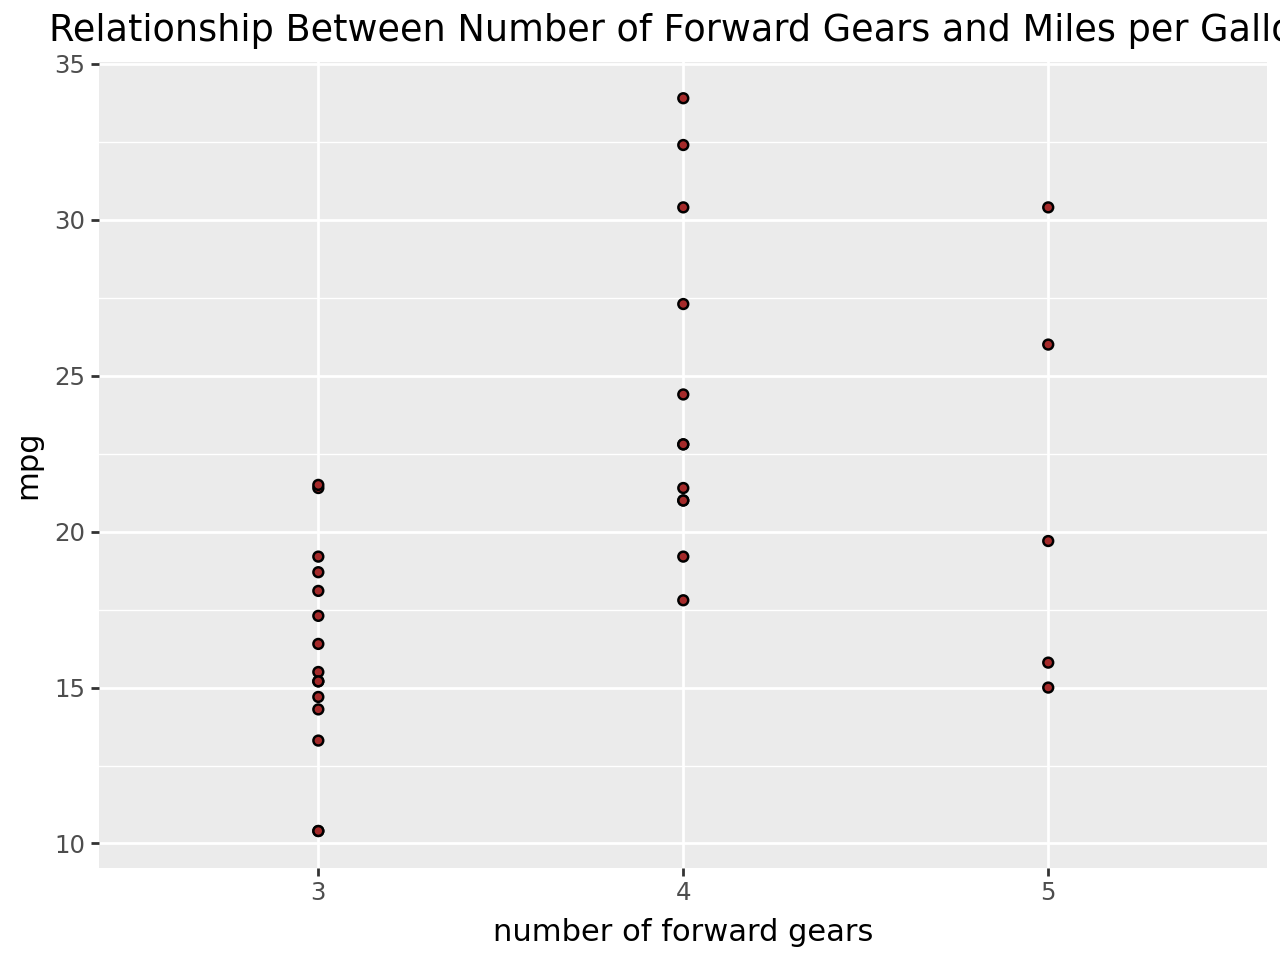

In [47]:
# Create plot with first new geometry here
plotScatter = (
    p9.ggplot(df, p9.aes(x = "gear", y = "mpg"))
    + p9.geom_point(fill = "brown")
    + p9.labs(
              title = "Relationship Between Number of Forward Gears and Miles per Gallon",
              x = "number of forward gears", y = "mpg")
)
plotScatter.show()

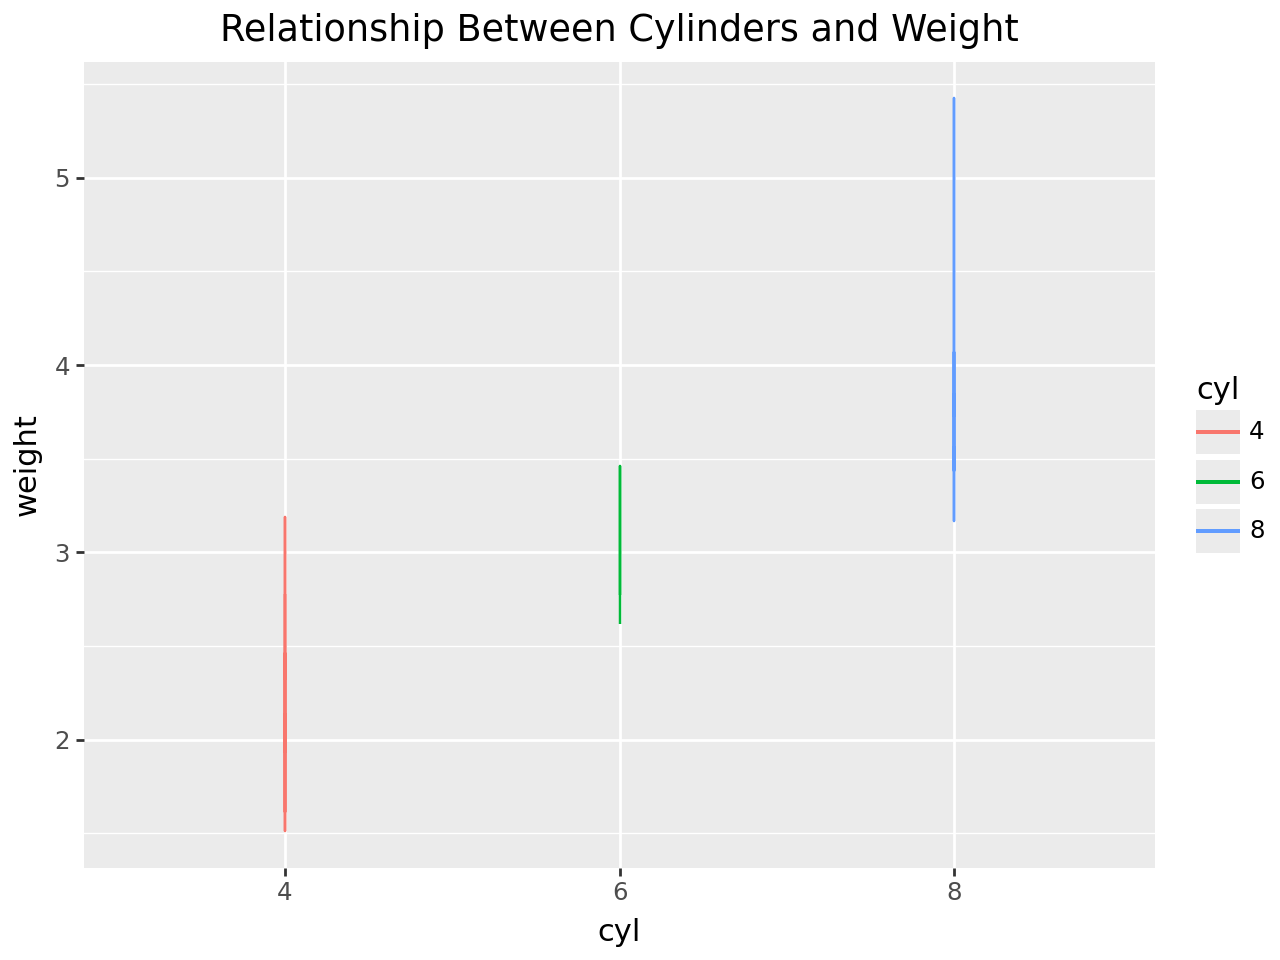

In [48]:
# Create plot with second new geometry here
# Using line plot to visualize the relationship between the number of cylinders and weight.
plotLine = (
    p9.ggplot(df, p9.aes(x = "cyl", y = "wt", color = "cyl"))
    + p9.geom_line()
    + p9.labs(
              title = "Relationship Between Cylinders and Weight",
              x = "cyl", y = "weight")
)
plotLine.show()

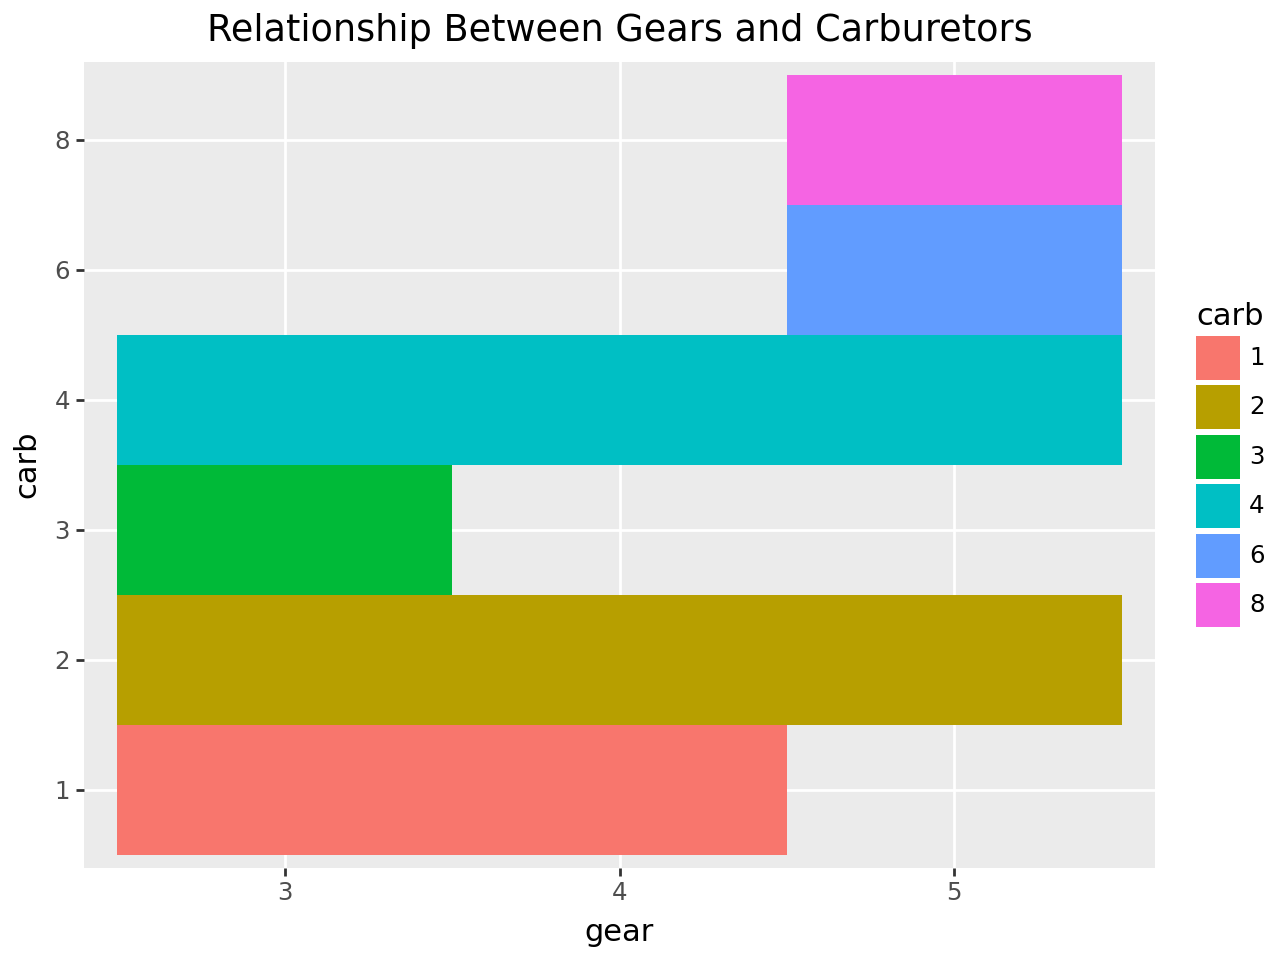

In [49]:
# Create plot with third new geometry here
# Using a heatmap to visualize the relationship between number of forward gears and number of carburetors

plotHeatmap = (
    p9.ggplot(df, p9.aes(x = "gear", y = "carb", fill = "carb"))
    + p9.geom_tile()
    + p9.labs(
        title = "Relationship Between Gears and Carburetors",
        x = "gear", y = "carb", fill = "carb"
    )
)
plotHeatmap.show()